In [1]:
import pandas as pd
import numpy as np
# Import matplotlib.
import matplotlib.pyplot as plt
# Import seaborn.
import seaborn as sns
# Import regular expression.
import re
import datetime as dt

In [2]:
df = pd.read_csv('pacific.csv')

Data Preprocessing

In [3]:
df.isnull().sum()

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [4]:
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [5]:
#dropping columns ID and Event
df = df.drop(columns = ['ID' , 'Event'])

In [6]:
# creating columns Latitude Hemisphere and Longitude Hemisphere with code 0 = N , 1 = S & 0 = E , 1 = W.
def hemisphere(coord):
        hem = re.findall(r'[NSWE]' , coord)[0]
        if hem == 'N' or hem == 'E':
            return 0
        else:
            return 1

In [7]:
# Creating the column Latitude_Hemisphere.    
df['Latitude_Hemisphere'] = df['Latitude'].apply(hemisphere)
df['Longitude_Hemisphere'] = df['Longitude'].apply(hemisphere)
df['Latitude_Hemisphere'] = df['Latitude_Hemisphere'].astype('category')
df['Longitude_Hemisphere'] = df['Longitude_Hemisphere'].astype('category')

In [8]:
# Convert the latitude and longitude Column to numeric type.
df['Latitude'] =  df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
df['Longitude'] =   df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

In [29]:
df.shape

(26137, 22)

In [9]:
df.head()

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,UNNAMED,19490611,0,TS,20.2,106.3,45,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
1,UNNAMED,19490611,600,TS,20.2,106.4,45,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
2,UNNAMED,19490611,1200,TS,20.2,106.7,45,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
3,UNNAMED,19490611,1800,TS,20.3,107.7,45,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1
4,UNNAMED,19490612,0,TS,20.4,108.6,45,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,0,1


In [10]:
# The missing values are given by -999 in this dataset. So , we need to fill them appropriately with mean of that column
for column in df.columns:
    missing_cnt = df[column][df[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
        mean = round(df[column][df[column] != -999 ].mean())
        index = df.loc[df[column] == -999 , column].index
        df.loc[df[column] == -999 , column] = mean

Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0
Missing Values in column Minimum Pressure =  12804
Missing Values in column Low Wind NE =  19750
Missing Values in column Low Wind SE =  19750
Missing Values in column Low Wind SW =  19750
Missing Values in column Low Wind NW =  19750
Missing Values in column Moderate Wind NE =  19750
Missing Values in column Moderate Wind SE =  19750
Missing Values in column Moderate Wind SW =  19750
Missing Values in column Moderate Wind NW =  19750
Missing Values in column High Wind NE =  19750
Missing Values in column High Wind SE =  19750
Missing Values in column High Wind SW =  19750
Missing Values in column High Wind NW =  19750
Missing Values in column Latitude_Hemisphere =  0
Missing Values in column Longitude_Hemisphere =  0


In [11]:
df.head()

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,UNNAMED,19490611,0,TS,20.2,106.3,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
1,UNNAMED,19490611,600,TS,20.2,106.4,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
2,UNNAMED,19490611,1200,TS,20.2,106.7,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
3,UNNAMED,19490611,1800,TS,20.3,107.7,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
4,UNNAMED,19490612,0,TS,20.4,108.6,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1


In [12]:
# Change all time to format HHMM.
df['Time'] = df['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Apply the function.
df['Time'] = df['Time'].apply(hhmm)

In [13]:
# Convert the Time column into HH:MM:SS.
df['Time'] = pd.to_datetime(df['Time'] , format='%H%M').dt.time

In [14]:
# Convert date column as datetime.
df['Date'] = pd.to_datetime(df['Date'] , format= '%Y%m%d')

In [15]:
df.head()

,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_Hemisphere,Longitude_Hemisphere
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,106.3,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,106.4,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,106.7,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,107.7,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,108.6,45,995,40,35,...,13,11,9,11,5,4,3,5,0,1


In [16]:
# Convert the status column to categorical.
df['Status'] = df['Status'].astype('category')


In [17]:
from sklearn.preprocessing import LabelEncoder

y = df['Status']

le = LabelEncoder()
le.fit(y)
df.loc[:,'Status'] = le.transform(y)
print(le.classes_)

[' DB' ' ET' ' EX' ' HU' ' HU ' ' LO' ' PT' ' SD' ' SS' ' ST' ' TD' ' TS']


In [18]:
df['Status'].unique()

array([11,  3, 10,  2,  5,  1,  0,  7,  8,  6,  9,  4])

In [19]:
# Set the dependent and independent variables.
X = df[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW']]
y = df['Status']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, cohen_kappa_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,  average = 'weighted')
precision = precision_score(y_test, y_pred,  average = 'weighted')
print(cohen_kappa_score(y_test, y_pred))

0.951096540649198


C:\Users\91880\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


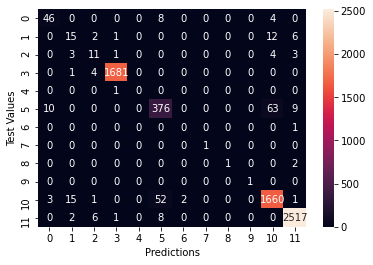

Accuracy score is 0.9654169854628921
precision score is 0.9653602218602807
Kappa Score 0.951096540649198


In [24]:
f, ax = plt.subplots(figsize = (6,4))
sns.heatmap(cm,annot=True,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()
print("Accuracy score is", score)
print("precision score is", precision)
print("Kappa Score",cohen_kappa_score(y_test, y_pred))

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
y_pred = classifier_rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, cohen_kappa_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,  average = 'weighted')
precision = precision_score(y_test, y_pred,  average = 'weighted')
print(cohen_kappa_score(y_test, y_pred))

0.9603746982555331


C:\Users\91880\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


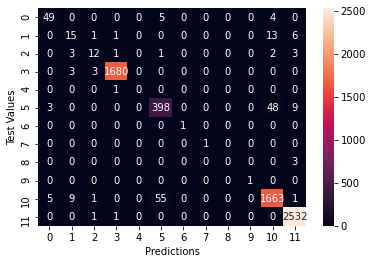

Accuracy score is 0.9719969395562357
precision score is 0.9707225444962088
Kappa Score 0.9603746982555331


In [28]:
f, ax = plt.subplots(figsize = (6,4))
sns.heatmap(cm,annot=True,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()
print("Accuracy score is", score)
print("precision score is", precision)
print("Kappa Score",cohen_kappa_score(y_test, y_pred))